In [36]:
import matplotlib.pyplot as plt

import numpy as np

In [62]:
C  = 2e8
S0 = 1340
S2 = -0.477
alpha_ice = 0.62
alpha_noice = 0.3
T_ice = 258
T_NoIce = 288
A = -367.3
B = 2.09

In [64]:
temp = np.linspace(230 , 300, 100)
x_ice = ice_edge(temp)

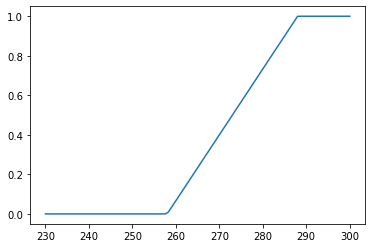

In [65]:
plt.plot(temp, x_ice)

In [96]:
def ice_edge(temperature):
    temperature = np.array(temperature)
    ice = temperature > T_NoIce
    no_ice =  temperature < T_ice

    middle = np.ones_like(no_ice) - no_ice.astype(float) - ice.astype(float)
    x_edge = middle * (1+((temperature - T_NoIce)/(T_NoIce-T_ice))) + ice.astype(float)
    return x_edge

def albedo(x_edge):
    alpha = alpha_ice + (alpha_noice - alpha_ice) * ((1-S2/2) * x_edge + S2/2 * x_edge**3)
    return alpha


def EBM(alpha, Ts):
    dT = 1/C * (S0/4 * (1 - alpha) - (A + B * Ts))
    return dT


def first_term(alpha):
    return S0 / 4 * (1 - alpha)


def second_term(Ts):
    return A + B * Ts


<ipython-input-97-446d882fbfca>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


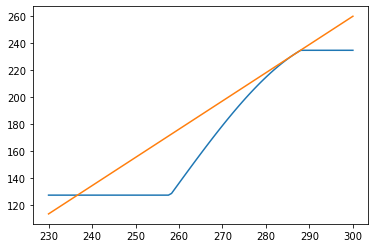

In [97]:

T_earth = np.linspace(230, 300, 100)

albedo_earth = albedo(ice_edge(T_earth))
first = first_term(albedo_earth)
second = second_term(T_earth)

fig, ax = plt.subplots()

ax.plot(T_earth, first)
ax.plot(T_earth, second)
fig.show()


In [98]:
def step(temp):
    x_ice_edge = ice_edge(temp)
    albedo_temp = albedo(x_ice_edge)
    T_step = EBM(albedo_temp, temp)
    return T_step

In [112]:
dt = 300
temp_start = 280
temps = []
time = 0
times = []
for i in range(1000000):
    temps.append(temp_start)
    times.append(time)
    temp_start = temp_start + step(temp_start) * dt
    time += dt
    

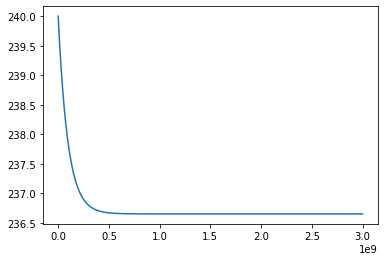

In [113]:
plt.plot(times, temps)

In [107]:
temps

[240,
 239.9999965,
 239.99999300000366,
 239.99998950001097,
 239.99998600002195,
 239.99998250003657,
 239.99997900005485,
 239.9999755000768,
 239.9999720001024,
 239.99996850013164,
 239.99996500016456,
 239.99996150020115,
 239.99995800024138,
 239.99995450028527,
 239.99995100033283,
 239.99994750038402,
 239.9999440004389,
 239.99994050049742,
 239.99993700055958,
 239.99993350062542,
 239.99993000069492,
 239.99992650076805,
 239.99992300084486,
 239.99991950092533,
 239.99991600100944,
 239.9999125010972,
 239.99990900118866,
 239.99990550128376,
 239.9999020013825,
 239.99989850148492,
 239.999895001591,
 239.99989150170072,
 239.9998880018141,
 239.99988450193115,
 239.99988100205184,
 239.9998775021762,
 239.9998740023042,
 239.99987050243587,
 239.9998670025712,
 239.99986350271018,
 239.9998600028528,
 239.9998565029991,
 239.99985300314907,
 239.99984950330267,
 239.99984600345994,
 239.99984250362087,
 239.99983900378544,
 239.99983550395368,
 239.99983200412558,
 239.9